In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    Factor=1
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/(Factor**2*error[i]*error[i])
        sum_sigma += 1/(Factor**2*error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_ratio_error(value1,error1,value2,error2):
    return value1/value2,abs(error1-error2)/error2
    #return value1/value2,(value1/value2)*math.sqrt((error1/(4*math.pi**2*value1))**2+(error2/(4*math.pi**2*value2))**2)
#this is actually same method
#def Get_ratio_error(value1,error1,valuem,errorm):
#    return abs(value1-valuem)/valuem,abs(value1-valuem)/valuem*math.sqrt((error1/value1)**2+(errorm/valuem)**2)
#def Get_ratio_error(value1,error1,valuem,errorm):
#    return abs(value1-valuem)/value1,abs(value1-valuem)/value1*math.sqrt((error1/(4*math.pi**2*value1))**2+(errorm/(4*math.pi**2*valuem))**2)

In [3]:

#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_theta_minus.dat',delim_whitespace=True)
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_theta_plus.dat',delim_whitespace=True)
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_mtheta_output.dat',delim_whitespace=True)#after change kin bin to center
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_ptheta_output.dat',delim_whitespace=True)#after change kin bin to center
df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_mWmWp.dat',delim_whitespace=True)#after change kin bin to center
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_mWpWp.dat',delim_whitespace=True)#after change kin bin to center
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_pWpWp.dat',delim_whitespace=True)#after change kin bin to center
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/output_pWmWp.dat',delim_whitespace=True)#after change kin bin to center
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_mWmWp.dat',delim_whitespace=True)#after change kin bin to center


df_xs_kT8_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.553460,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000332,0.0,0.0,neutron,pi+,solid,0.000332
1,1,11.0,0.125,-1.735452,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000814,0.0,0.0,neutron,pi+,solid,0.000814
2,2,11.0,0.125,-1.422743,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000950,0.0,0.0,neutron,pi+,solid,0.000950
3,3,11.0,0.125,-1.110744,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.001162,0.0,0.0,neutron,pi+,solid,0.001162
4,4,11.0,0.125,-0.797371,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.001451,0.0,0.0,neutron,pi+,solid,0.001451


In [4]:
#df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhancedNpip_kT=0.404GeV.dat',delim_whitespace=True)
#df_xs_kT4_zQ2xbjPhT.head()

In [5]:
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs.dat',delim_whitespace=True)
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/input_default.dat',delim_whitespace=True)#default using bin center
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_default_largex_xsGeVm2.dat',delim_whitespace=True)#default using bin average
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_default_xsGeVm2_output.dat',delim_whitespace=True)#default using bin center
df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_default_xsGeVm2_xnew_output.dat',delim_whitespace=True)#default using large x bin center
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_kT2_pT2_mod_2015.dat',delim_whitespace=True)
#df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/CS_ptheta_output.dat',delim_whitespace=True)

df_xs_kT6_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.125,-2.553460,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000332,0.0,0.0,neutron,pi+,solid,0.000332
1,1,11.0,0.125,-1.735452,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000814,0.0,0.0,neutron,pi+,solid,0.000814
2,2,11.0,0.125,-1.422743,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.000950,0.0,0.0,neutron,pi+,solid,0.000950
3,3,11.0,0.125,-1.110744,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.001162,0.0,0.0,neutron,pi+,solid,0.001162
4,4,11.0,0.125,-0.797371,0.48445,0.35,1.25,0.1,FUUT,0.00122,0.001451,0.0,0.0,neutron,pi+,solid,0.001451


In [6]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.7]
PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]
phih_bins =[-PI,-0.6*PI,-0.4*PI,-0.2*PI,0,0.2*PI,0.4*PI,0.6*PI,0.8*PI,PI]
#df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['Ebeam']==8.8)&(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
#df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['Ebeam']==8.8)&(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['Ebeam']==11)&(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['Ebeam']==11)&(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]

3.141592653589793


In [7]:
#df_xs_kT6_check=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[0])&(df_xs_kT6_zQ2['z']<z_cuts[1])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[0])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[1])]
#print(df_xs_kT6_check)

80 80
87 87
85 83
71 71
137 137
138 138
137 137
133 133
66 66
68 68
67 67
66 66


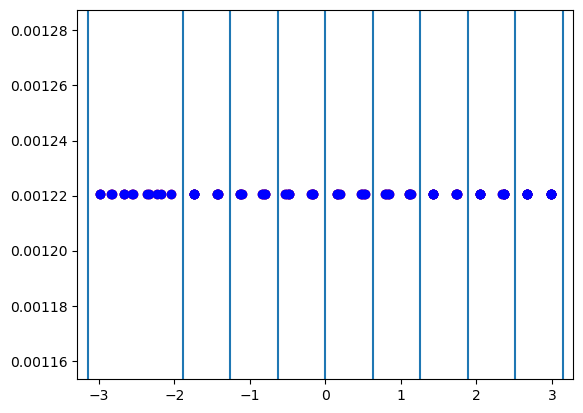

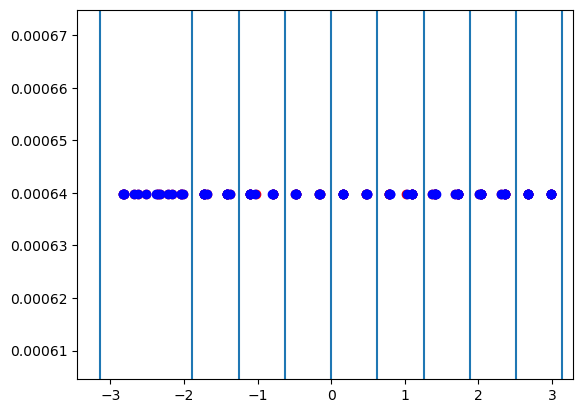

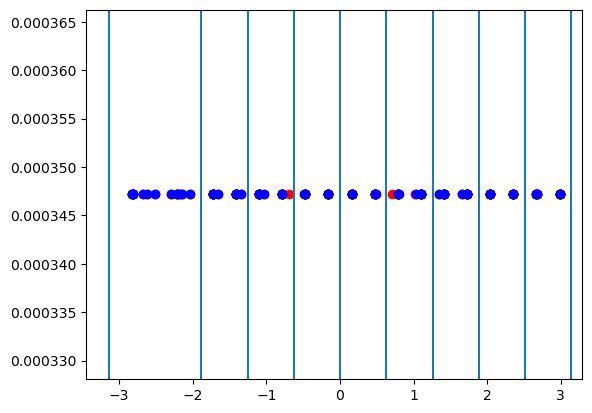

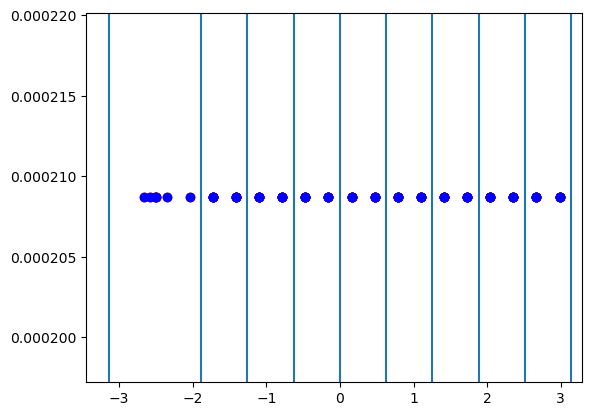

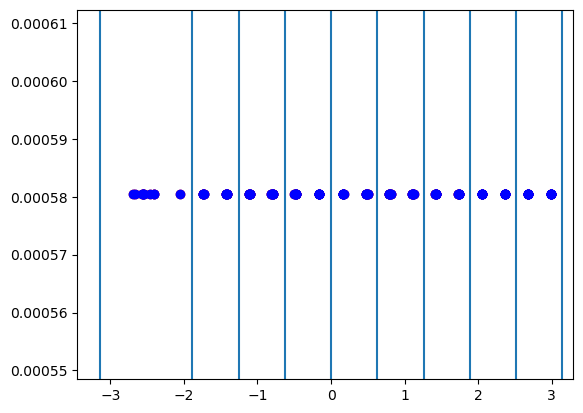

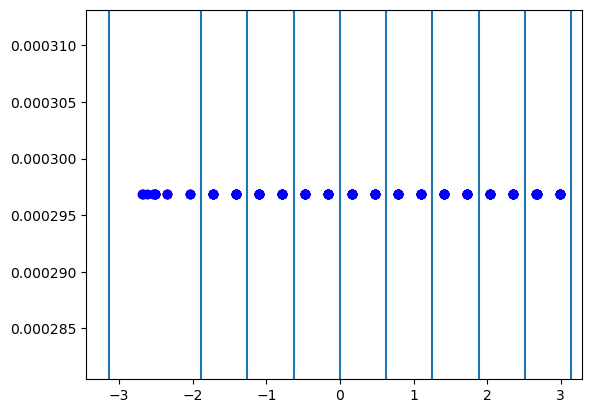

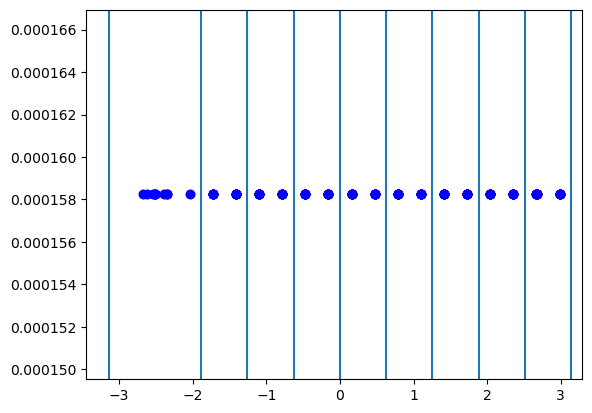

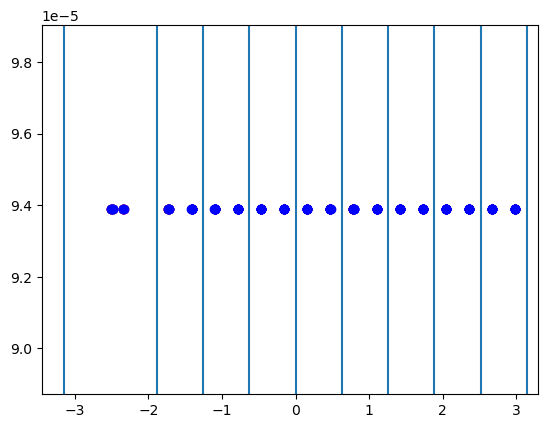

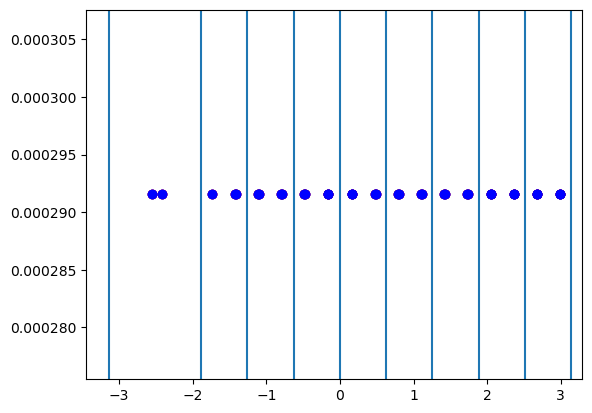

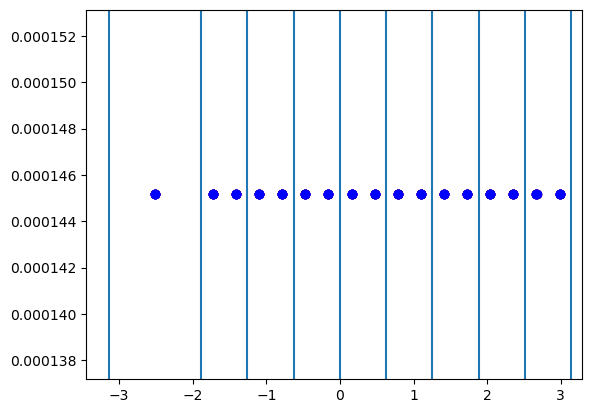

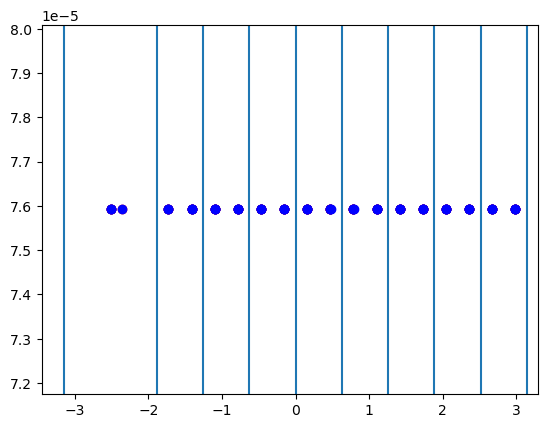

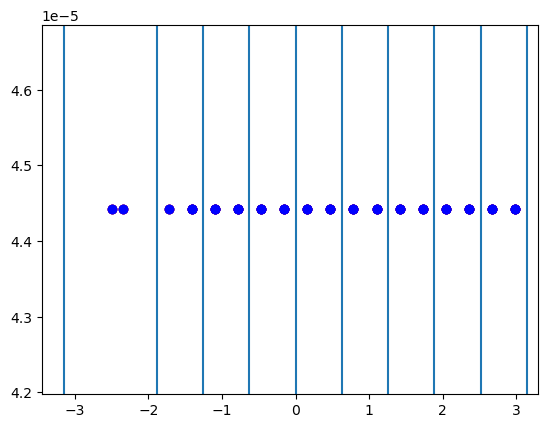

In [8]:

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        print(len(phih_kT8),len(phih_kT6))
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        plt.plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        for i_phih in phih_bins:
            plt.axvline(x=i_phih)

rows,cols,row_phi 3 4 9
{}
-3.141592653589793 -1.8849555921538759
13
z,Q2,phi 0 0 0
-1.8849555921538759 -1.2566370614359172
8
z,Q2,phi 0 0 1
-1.2566370614359172 -0.6283185307179586
8
z,Q2,phi 0 0 2
-0.6283185307179586 0
8
z,Q2,phi 0 0 3
0 0.6283185307179586
8
z,Q2,phi 0 0 4
0.6283185307179586 1.2566370614359172
8
z,Q2,phi 0 0 5
1.2566370614359172 1.8849555921538759
8
z,Q2,phi 0 0 6
1.8849555921538759 2.5132741228718345
9
z,Q2,phi 0 0 7
2.5132741228718345 3.141592653589793
10
z,Q2,phi 0 0 8
-3.141592653589793 -1.8849555921538759
15
z,Q2,phi 0 1 0
-1.8849555921538759 -1.2566370614359172
10
z,Q2,phi 0 1 1
-1.2566370614359172 -0.6283185307179586
9
z,Q2,phi 0 1 2
-0.6283185307179586 0
8
z,Q2,phi 0 1 3
0 0.6283185307179586
8
z,Q2,phi 0 1 4
0.6283185307179586 1.2566370614359172
9
z,Q2,phi 0 1 5
1.2566370614359172 1.8849555921538759
10
z,Q2,phi 0 1 6
1.8849555921538759 2.5132741228718345
10
z,Q2,phi 0 1 7
2.5132741228718345 3.141592653589793
8
z,Q2,phi 0 1 8
-3.141592653589793 -1.8849555921538

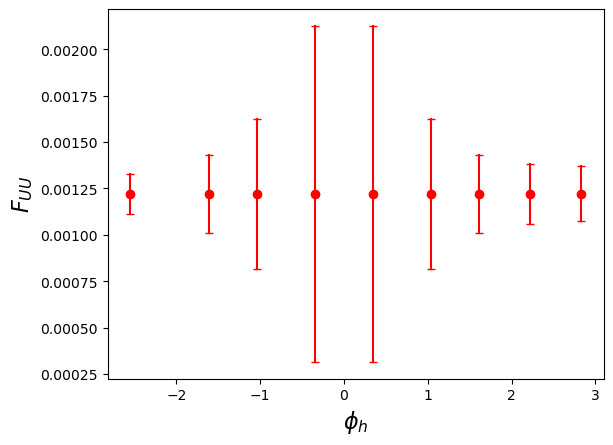

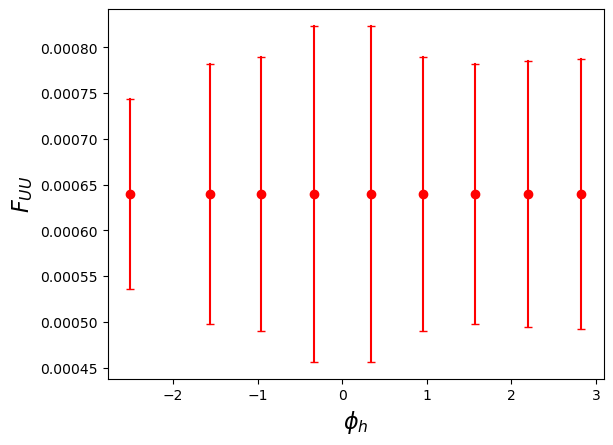

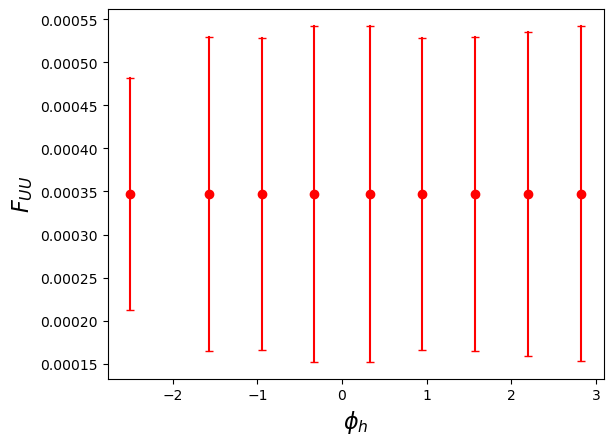

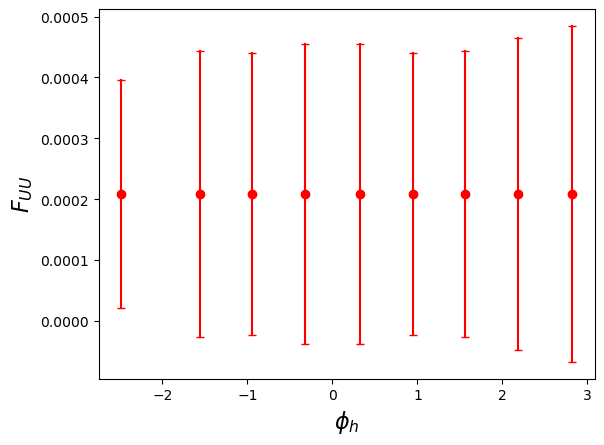

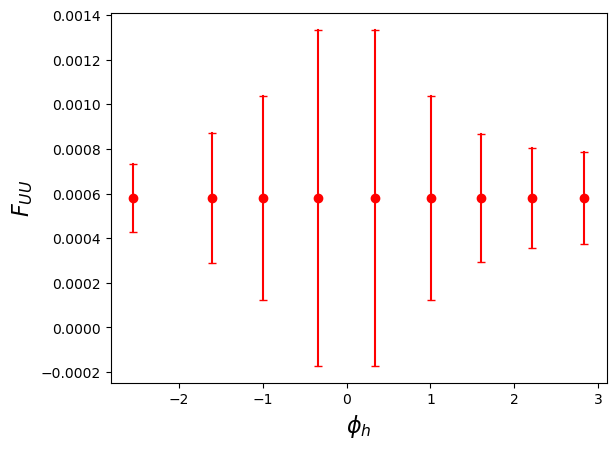

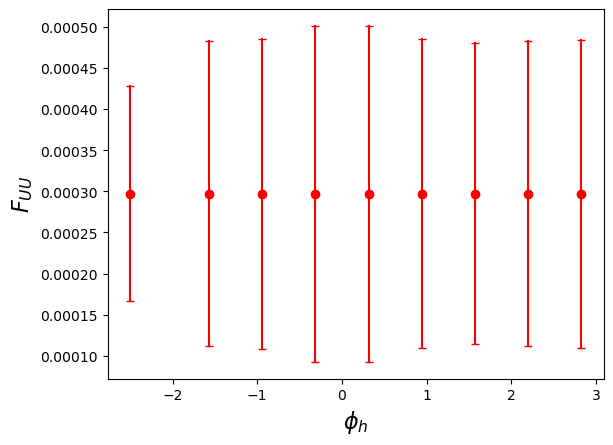

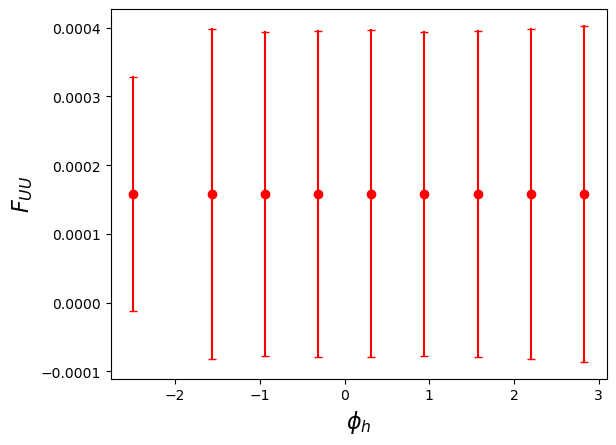

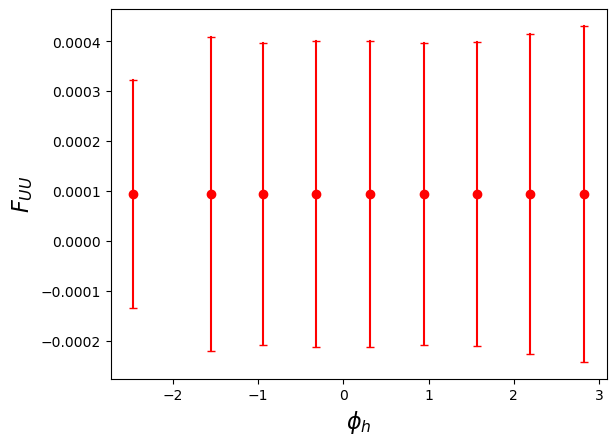

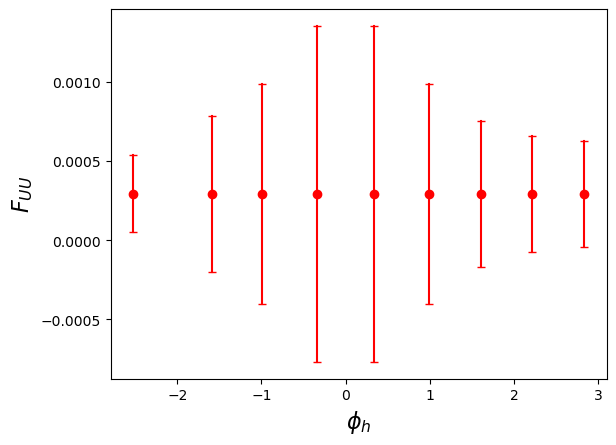

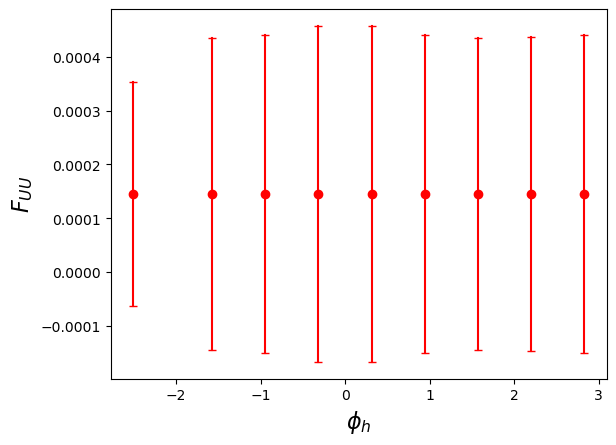

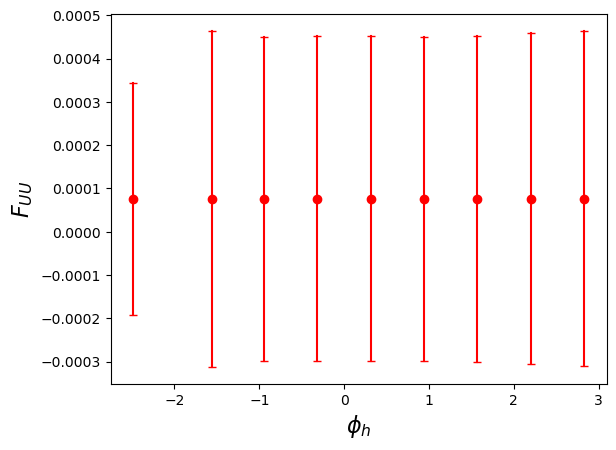

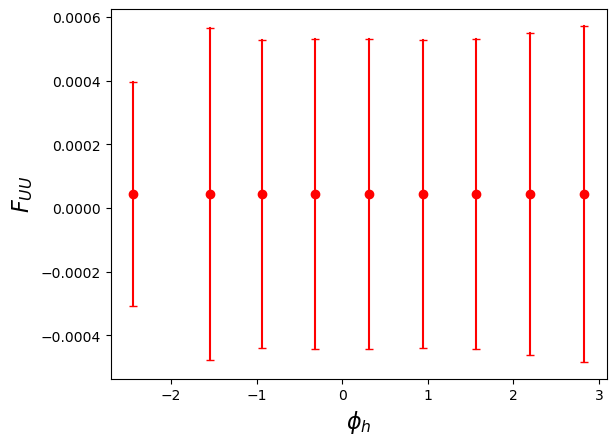

In [9]:
import pprint
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT8={}
Fuus_kT8 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT8 = {}#[[[0]*rows]*cols]*row_phi
print('rows,cols,row_phi',rows,cols,row_phi)
pprint.pprint(phihs_kT8)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        #phih_kT4 = df_xs_kT4['phih'].to_list()
        #Fuu_kT4 = df_xs_kT4['value'].to_list()
        #print(len(phih_kT8),len(phih_kT4))
        phih_kT8=[]
        Fuu_kT8=[]
        Fuu_kT8_stat=[]
        Fuu_kT8_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT8s = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['phih'].tolist()
            Fuu_kT8s = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['value'].tolist()
            Fuu_kT8_stats = df_xs_kT8[(df_xs_kT8['phih']>=i_phi_left)&(df_xs_kT8['phih']<i_phi)]['stat'].tolist()
            print(len(phih_kT8s))
    
            if len(phih_kT8s)>0:  
                #print('phih',phih_kT8s)
                #print('Fuu',Fuu_kT8s)
                #print('Fuu_stat',Fuu_kT8_stats)
                _Fuu_kT8 = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[0]
                _Fuu_kT8_stat = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[1]
                _phih_kT8= Get_weighted_average_phi(phih_kT8s,Fuu_kT8_stats)[0]
                #print('_Fuu_kT8',_Fuu_kT8)
                #print('_phih',_phih_kT8)
                #print('_Fuu_stat',_Fuu_kT8_stat)
                Fuu_kT8.append(_Fuu_kT8)
                phih_kT8.append(_phih_kT8)
                Fuu_kT8_stat.append(_Fuu_kT8_stat)
                Fuu_kT8_sys.append(0.05*_Fuu_kT8)
                print('z,Q2,phi',i_z-1,i_Q2-1,i_phi_count)
                phihs_kT8[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT8)
                #pprint.pprint(phihs_kT8)
                Fuus_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8)
                Fuus_err_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8_stat)
                i_phi_count+=1
                #print(Fuu_kT8,phih_kT8)
                ax.plot([_phih_kT8,_phih_kT8],[_Fuu_kT8-_Fuu_kT8_stat,_Fuu_kT8+_Fuu_kT8_stat],color='red',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT8,Fuu_kT8,'ro')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT8) 

80 80
-3.141592653589793 -1.8849555921538759
13
-1.8849555921538759 -1.2566370614359172
8
-1.2566370614359172 -0.6283185307179586
8
-0.6283185307179586 0
8
0 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
8
1.2566370614359172 1.8849555921538759
8
1.8849555921538759 2.5132741228718345
9
2.5132741228718345 3.141592653589793
10
87 87
-3.141592653589793 -1.8849555921538759
15
-1.8849555921538759 -1.2566370614359172
10
-1.2566370614359172 -0.6283185307179586
9
-0.6283185307179586 0
8
0 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
9
1.2566370614359172 1.8849555921538759
10
1.8849555921538759 2.5132741228718345
10
2.5132741228718345 3.141592653589793
8
83 83
-3.141592653589793 -1.8849555921538759
13
-1.8849555921538759 -1.2566370614359172
10
-1.2566370614359172 -0.6283185307179586
9
-0.6283185307179586 0
8
0 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
9
1.2566370614359172 1.8849555921538759
10
1.8849555921538759 2.5132741228718345
8
2.5132741228718345 

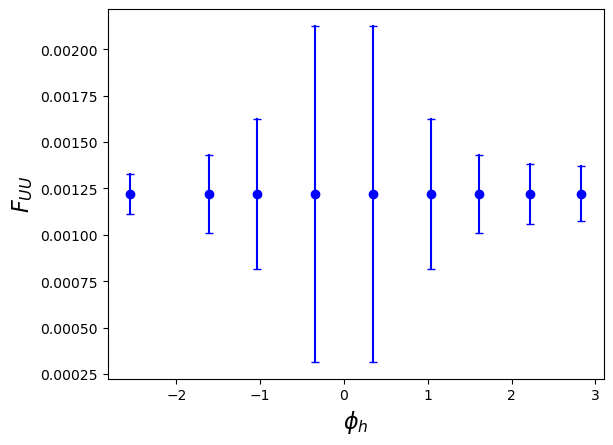

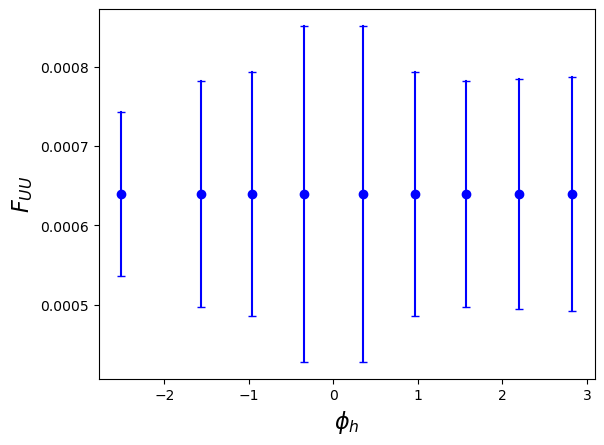

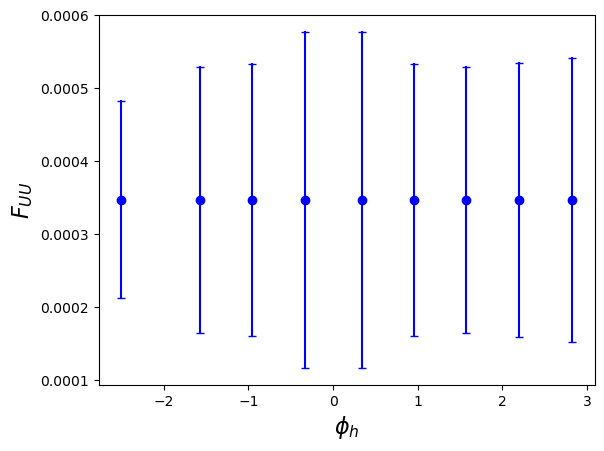

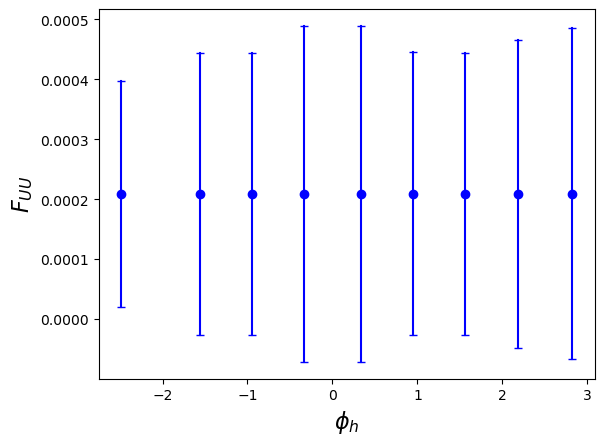

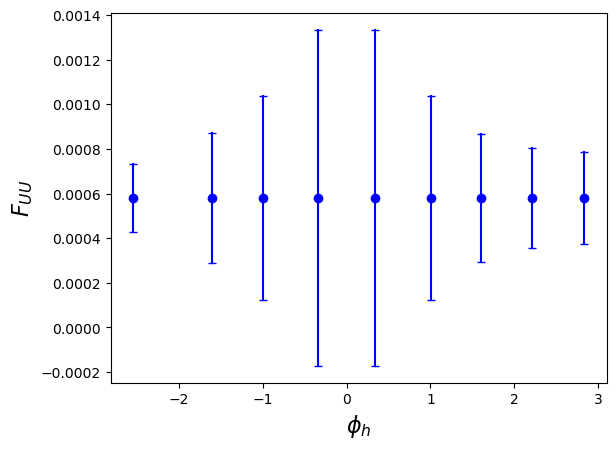

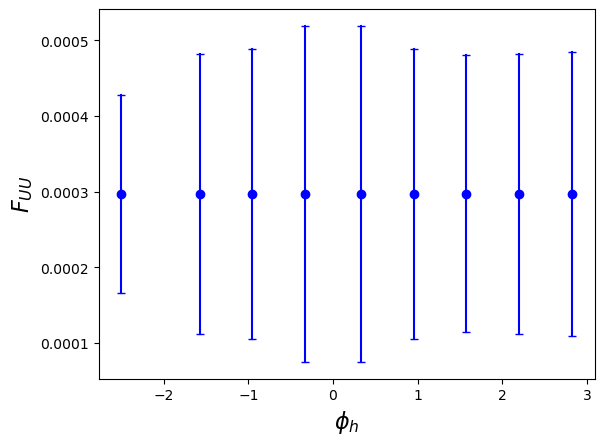

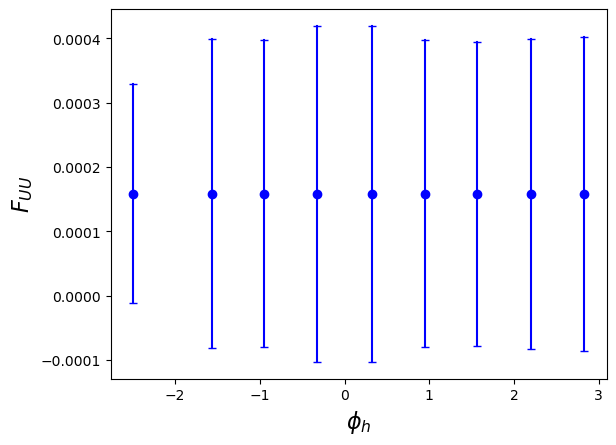

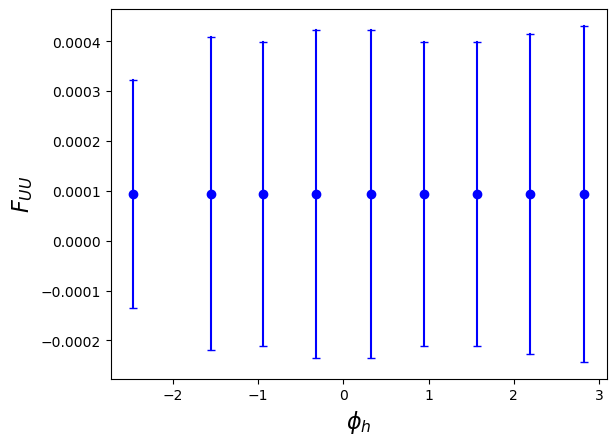

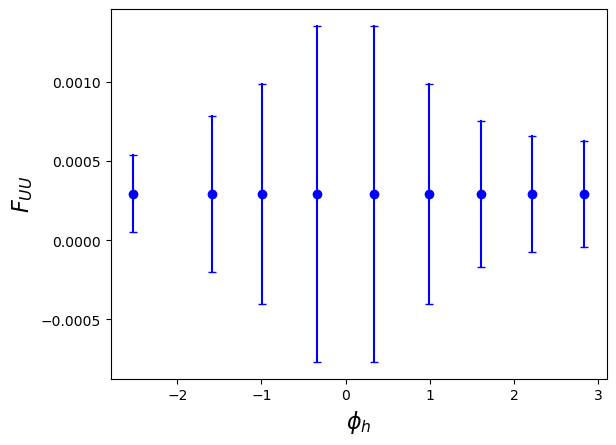

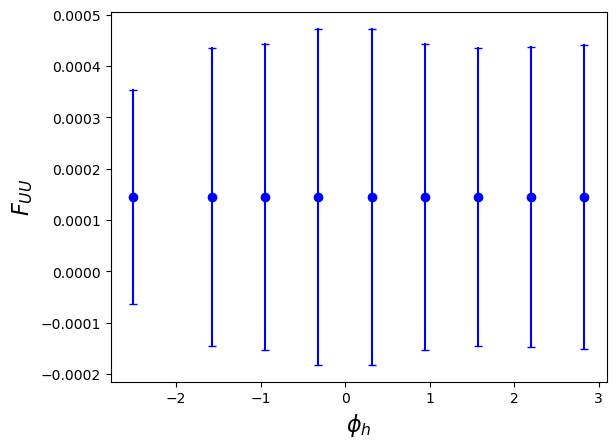

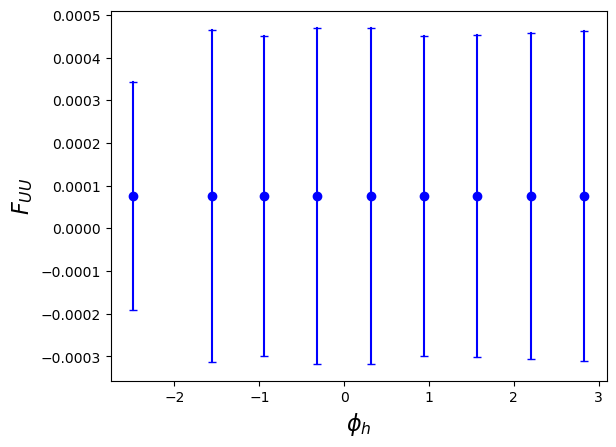

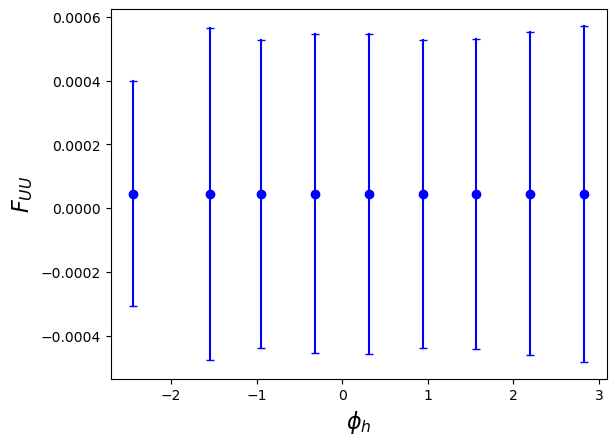

In [10]:
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT6 ={}# [[[0]*rows]*cols]*row_phi
Fuus_kT6 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT6 = {}#[[[0]*rows]*cols]*row_phi

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        df_xs_kT6=df_xs_kT6_zQ2[(df_xs_kT6_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT6_zQ2['z']<z_cuts[i_z])&(df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2])]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        print(len(phih_kT6),len(phih_kT6))
        phih_kT6=[]
        Fuu_kT6=[]
        Fuu_kT6_stat=[]
        Fuu_kT6_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT6s = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['phih'].tolist()
            Fuu_kT6s = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['value'].tolist()
            Fuu_kT6_stats = df_xs_kT6[(df_xs_kT6['phih']>=i_phi_left)&(df_xs_kT6['phih']<i_phi)]['stat'].tolist()
            print(len(phih_kT6s))
    
            if len(phih_kT6s)>0:  
                #print('phih',phih_kT6s)
                #print('Fuu',Fuu_kT6s)
                #print('Fuu_stat',Fuu_kT6_stats)
                _Fuu_kT6 = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[0]
                _Fuu_kT6_stat = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[1]
                _phih_kT6= Get_weighted_average_phi(phih_kT6s,Fuu_kT6_stats)[0]
                #print('_Fuu_kT6',_Fuu_kT6)
                #print('_phih',_phih_kT6)
                #print('_Fuu_stat',_Fuu_kT6_stat)
                Fuu_kT6.append(_Fuu_kT6)
                phih_kT6.append(_phih_kT6)
                Fuu_kT6_stat.append(_Fuu_kT6_stat)
                Fuu_kT6_sys.append(0.05*_Fuu_kT6)
                phihs_kT6[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT6)
                Fuus_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6)
                Fuus_err_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6_stat)
                i_phi_count+=1
                #print(Fuu_kT6,phih_kT6)
                ax.plot([_phih_kT6,_phih_kT6],[_Fuu_kT6-_Fuu_kT6_stat,_Fuu_kT6+_Fuu_kT6_stat],color='blue',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT6,Fuu_kT6,'bo')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT6)        

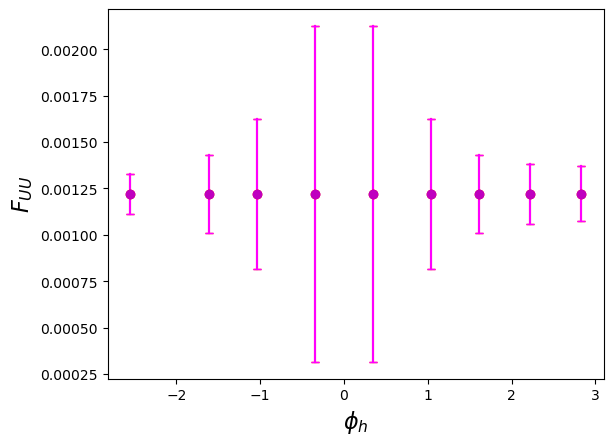

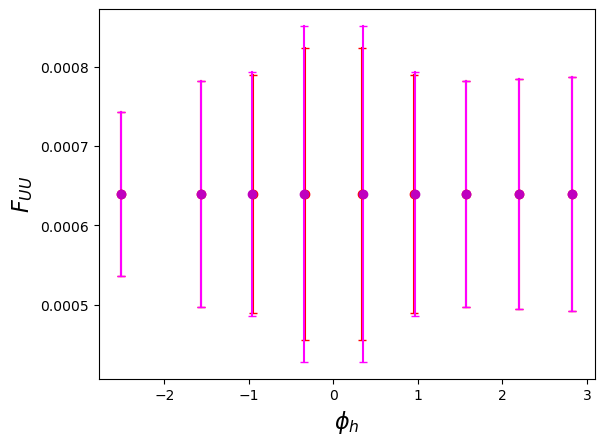

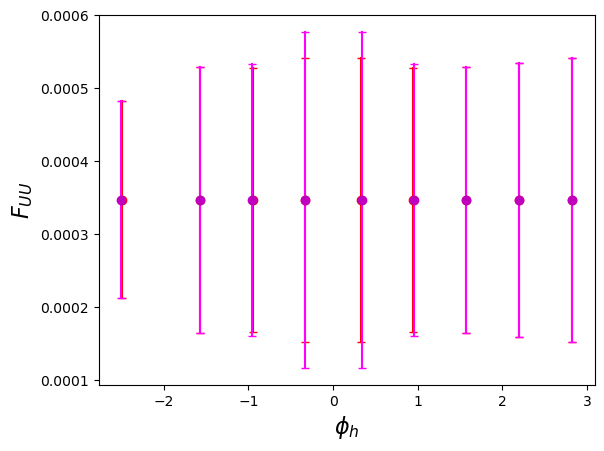

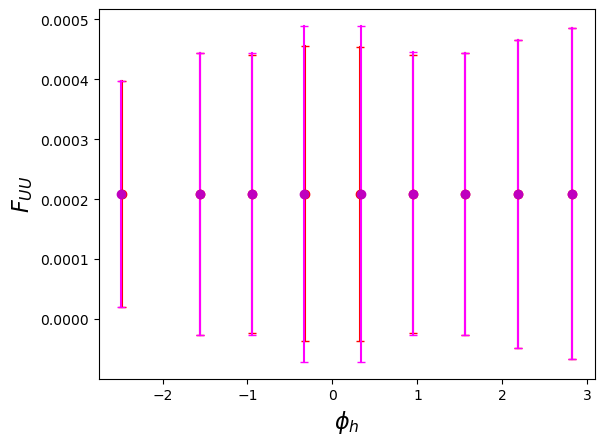

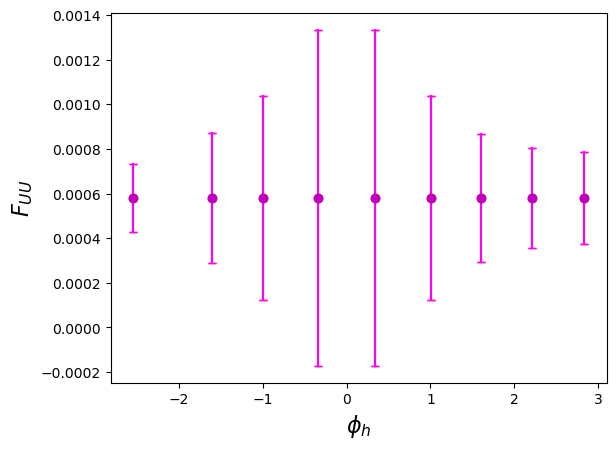

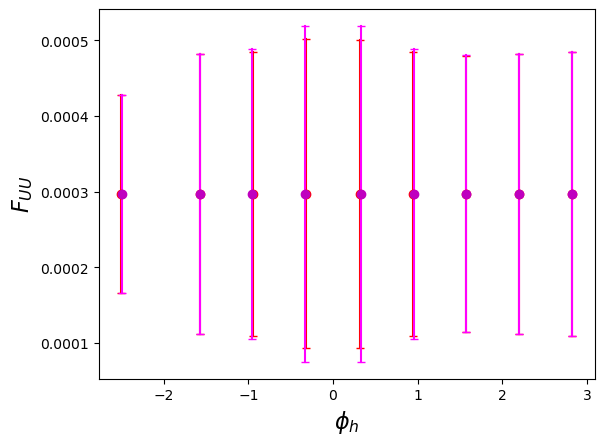

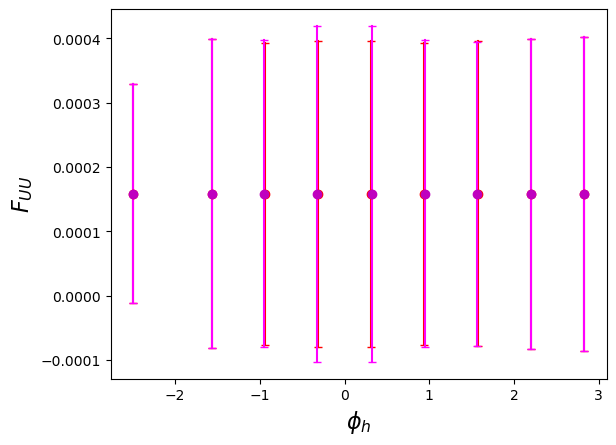

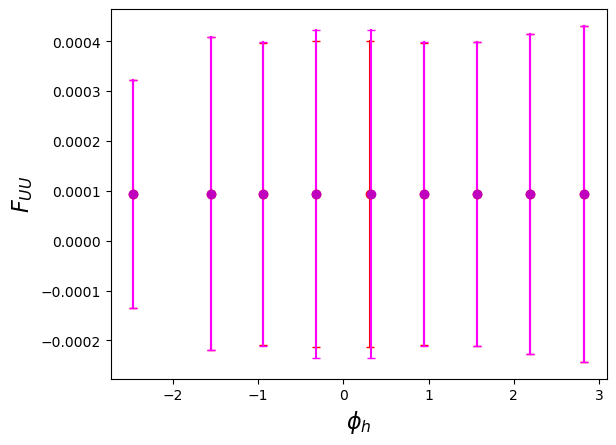

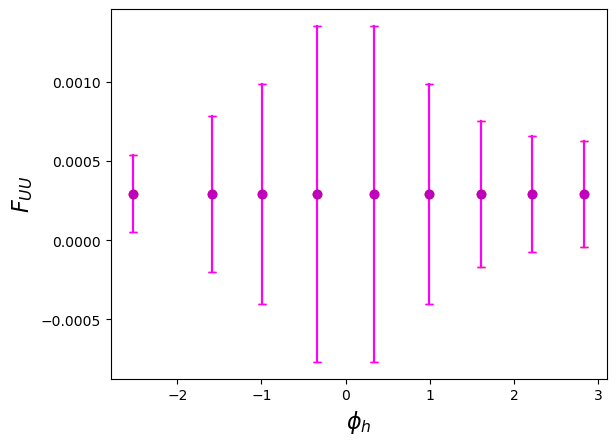

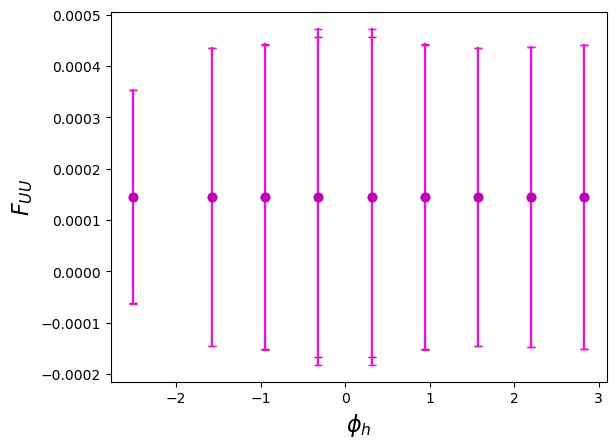

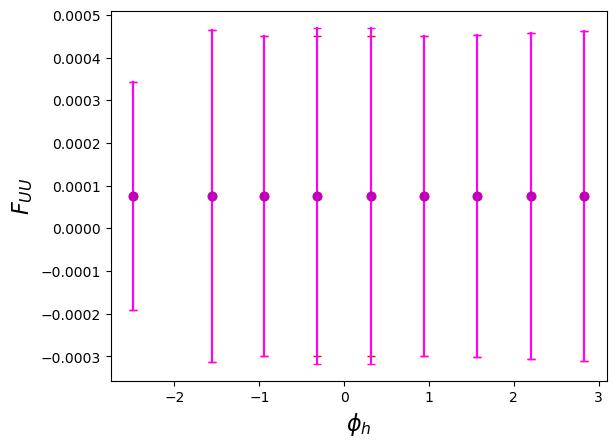

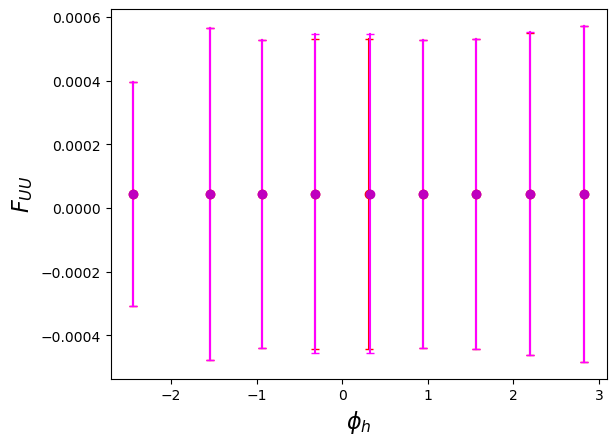

In [11]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                #Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                #Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                ax.plot([phihs_kT8[i_z-1,i_Q2-1,i_phi],phihs_kT8[i_z-1,i_Q2-1,i_phi]],[Fuu_kT8-Fuu_err_kT8,Fuu_kT8+Fuu_err_kT8],color='red',marker='_')
                #ax.plot([phihs_kT4[i_z-1,i_Q2-1,i_phi],phihs_kT4[i_z-1,i_Q2-1,i_phi]],[Fuu_kT4-Fuu_err_kT4,Fuu_kT4+Fuu_err_kT4],color='blue',marker='_')
                ax.plot([phihs_kT6[i_z-1,i_Q2-1,i_phi],phihs_kT6[i_z-1,i_Q2-1,i_phi]],[Fuu_kT6-Fuu_err_kT6,Fuu_kT6+Fuu_err_kT6],color='magenta',marker='_')
                plt.plot(phihs_kT8[i_z-1,i_Q2-1,i_phi],Fuus_kT8[i_z-1,i_Q2-1,i_phi],'ro',label='kT=0.804')
                #plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
                plt.plot(phihs_kT6[i_z-1,i_Q2-1,i_phi],Fuus_kT6[i_z-1,i_Q2-1,i_phi],'mo',label='kT=0.604')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


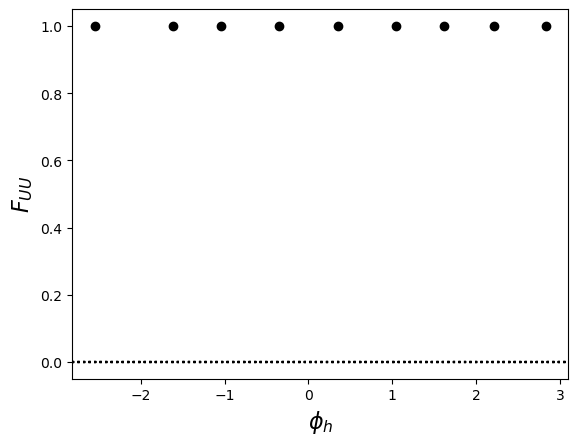

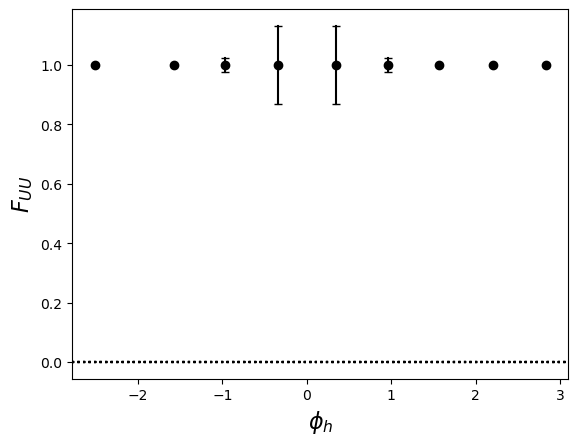

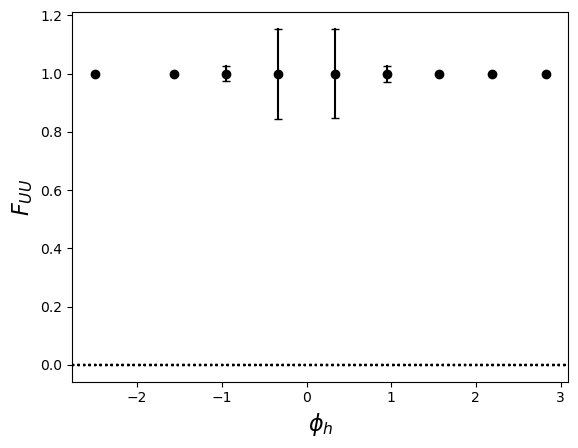

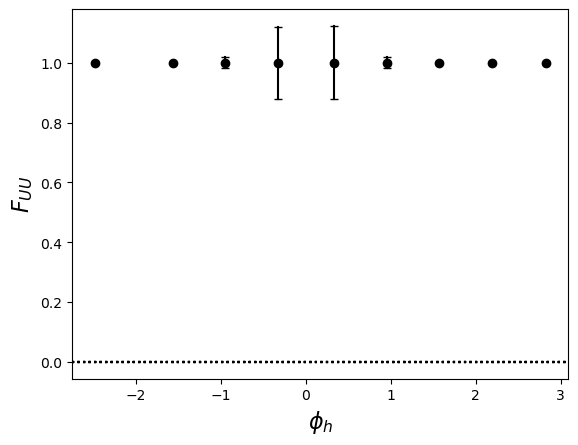

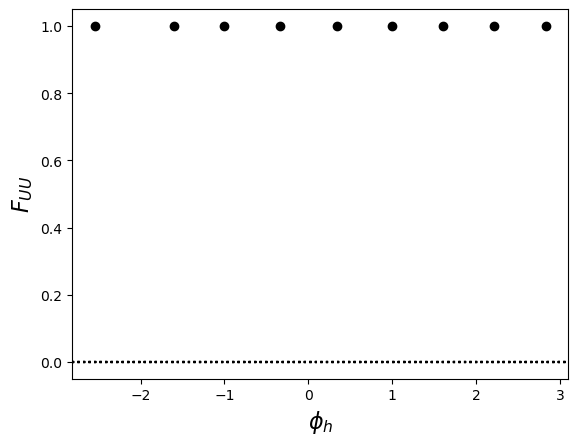

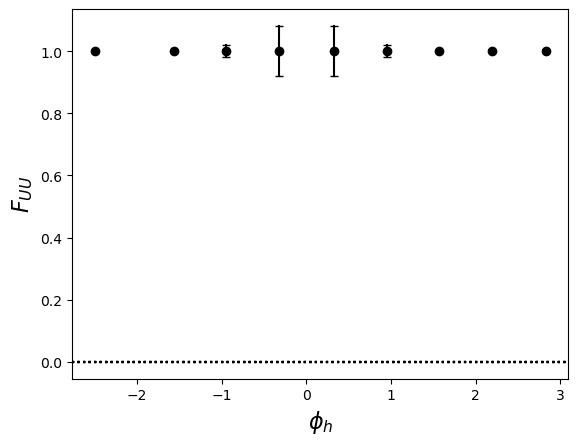

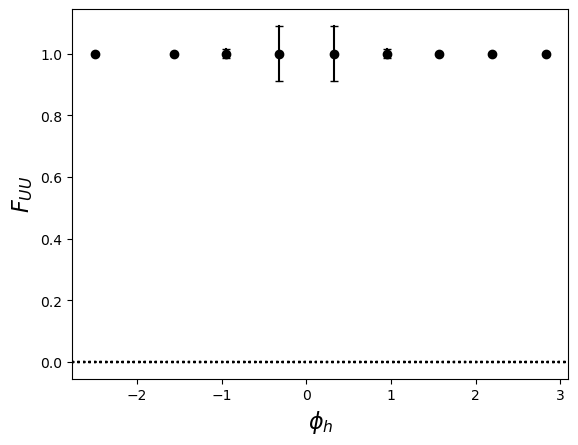

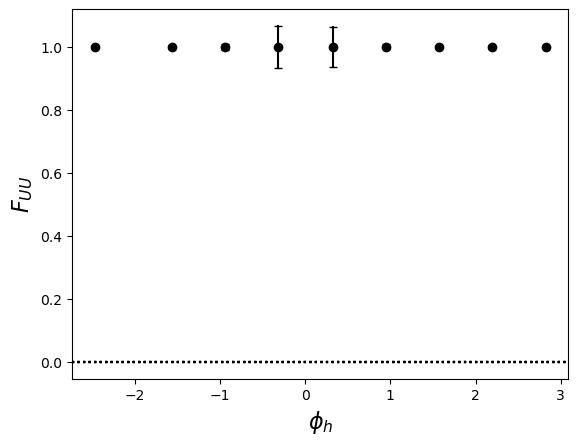

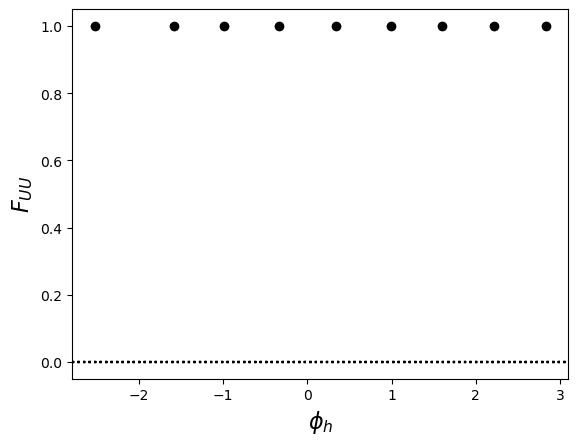

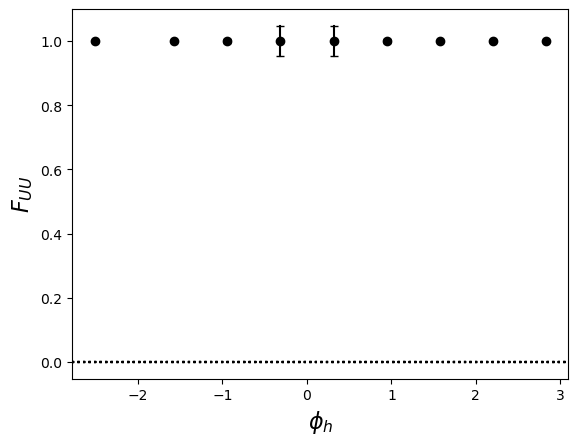

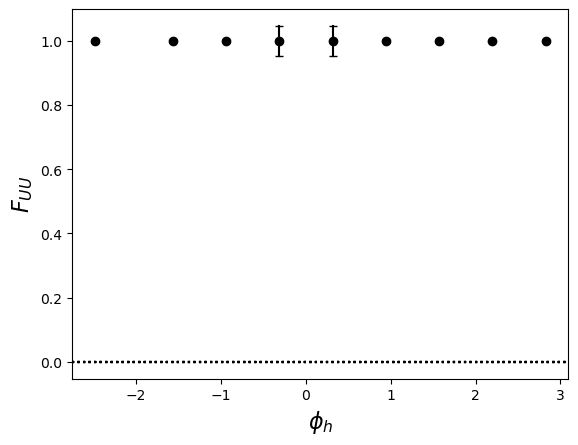

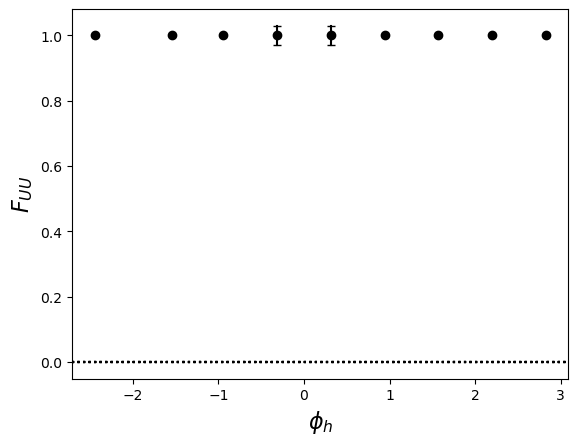

In [12]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                #Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                #Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                #_Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                #Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                #Fuu_ratio_err = (_Fuu_ratio_err+_Fuu_ratio2_err)/2
                Fuu_ratio=_Fuu_ratio
                Fuu_ratio_err=_Fuu_ratio_err
                ax.plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                plt.plot(phih,Fuu_ratio,'ko')
                plt.axhline(0,color = 'black',linestyle = ':')
                #plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


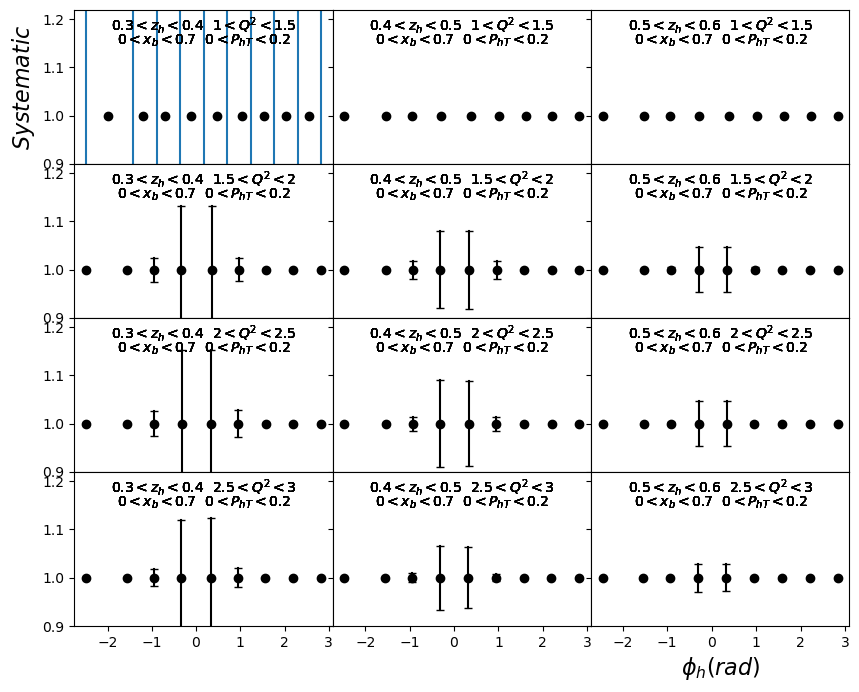

In [13]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
f=open('../Unpol_proposal/Materials/results_sys/sys.txt','w')
print("zl zr Q2l Q2r phihl phihr phih dFuu dFuu_err",file=f)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                #Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                #Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                #_Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                #Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                #Fuu_ratio_err = math.sqrt(_Fuu_ratio_err**2+_Fuu_ratio2_err**2)
                Fuu_ratio=_Fuu_ratio
                Fuu_ratio_err=_Fuu_ratio_err
                print(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],phih_bins[i_phi],phih_bins[i_phi+1],phih,Fuu_ratio,Fuu_ratio_err,file=f)
                axs[i_Q2-1][i_z-1].plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                axs[i_Q2-1][i_z-1].plot(phih,Fuu_ratio,'ko')
                #axs[i_Q2-1][i_z-1].axhline(1,color = 'black',linestyle = ':')
                axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
                axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
                

        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylim(-0.001,0.003)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        axs[i_Q2-1][i_z-1].set_ylim(0.9,1.22)
axs[0][0].set_ylabel('$Systematic$',fontsize=16)
for i_phih in phih_bins:
    axs[0][0].axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/results_sys/Systemaic_from_compare.pdf')
f.close()

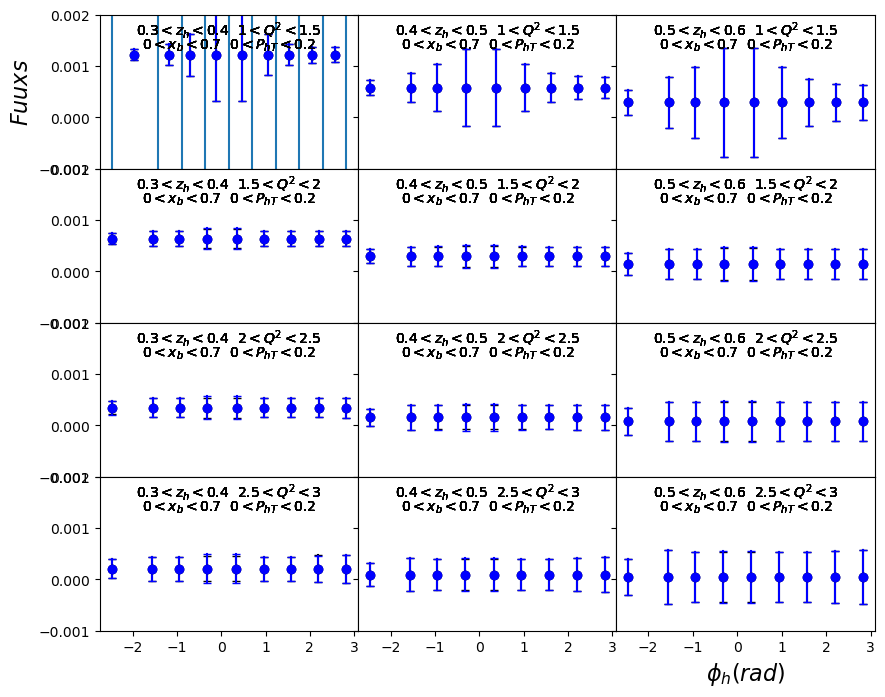

In [14]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
f=open('../Unpol_proposal/Materials/results_sys/sys.txt','w')
print("zl zr Q2l Q2r phihl phihr phih dFuu dFuu_err",file=f)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                #Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                #Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                #_Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                #Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                #Fuu_ratio_err = math.sqrt(_Fuu_ratio_err**2+_Fuu_ratio2_err**2)
                Fuu_ratio=_Fuu_ratio
                Fuu_ratio_err=_Fuu_ratio_err
                print(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],phih_bins[i_phi],phih_bins[i_phi+1],phih,Fuu_ratio,Fuu_ratio_err,file=f)
                axs[i_Q2-1][i_z-1].plot([phih,phih],[Fuu_kT8-Fuu_err_kT8,Fuu_kT8+Fuu_err_kT8],color='black',marker='_')
                axs[i_Q2-1][i_z-1].plot([phih,phih],[Fuu_kT6-Fuu_err_kT6,Fuu_kT6+Fuu_err_kT6],color='b',marker='_')
                axs[i_Q2-1][i_z-1].plot(phih,Fuu_kT8,'ko')
                axs[i_Q2-1][i_z-1].plot(phih,Fuu_kT6,'bo')
                #axs[i_Q2-1][i_z-1].axhline(1,color = 'black',linestyle = ':')
                axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
                axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
                

        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        axs[i_Q2-1][i_z-1].set_ylim(-0.001,0.002)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        #axs[i_Q2-1][i_z-1].set_ylim(0.7,1.3)
axs[0][0].set_ylabel('$Fuu xs$',fontsize=16)
for i_phih in phih_bins:
    axs[0][0].axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/results_sys/Fuu_xs_compare.pdf')
f.close()